### Notebook for analysis of predicted adult stem cells population with `Annotatability` 

- **Developed by:** Anna Maguza
- **Place:** Wuerzburg Institute for System Immunology
- **Created date:** 15th April 2024
- **Last modified date:** 25th April 2024

##### Import packages

In [27]:
from Annotatability import metrics, models
import numpy as np
import scanpy as sc
from torch.utils.data import TensorDataset, DataLoader , WeightedRandomSampler
import torch
import torch.optim as optim
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
import warnings
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
torch.cuda.is_available()

True

##### Setup working environment

In [3]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.10.7
scanpy      1.10.1
-----
Annotatability              NA
PIL                         10.3.0
anyio                       NA
arrow                       1.3.0
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
babel                       2.14.0
brotli                      1.1.0
certifi                     2024.02.02
cffi                        1.16.0
charset_normalizer          3.3.2
comm                        0.2.2
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.9.0
debugpy                     1.8.1
decorator                   5.1.1
defusedxml                  0.7.1
exceptiongroup              1.2.0
executing                   2.0.1
fastjsonschema              NA
fqdn                        NA
h5py                        3.11.0
idna                        3.6
ipykernel                   6.29.3
isoduration                 NA
jedi                        0.19.1
jinja2 

In [4]:
warnings.simplefilter(action = 'ignore')

In [5]:
def X_is_raw(adata):
    return np.array_equal(adata.X.sum(axis=0).astype(int), adata.X.sum(axis=0))

### Read in data

+ Reference data (fetal stem cells)

In [6]:
input = '/mnt/LaCIE/annaM/gut_project/Processed_data/Gut_data/Adult_stem_cells/Adult_stem_cells.h5ad'
adata = sc.read_h5ad(input)

In [7]:
X_is_raw(adata)

True

#### Train Annotatability

In [8]:
epoch_num=50

In [9]:
prob_list = models.follow_training_dyn_neural_net(adata, label_key='C_scANVI',iterNum=50, device=device)

[1,     2] loss: 0.300
[1,    12] loss: 1.791
[1,    22] loss: 1.106
[1,    32] loss: 1.035
[1,    42] loss: 0.985
[1,    52] loss: 0.943
[1,    62] loss: 0.934
[1,    72] loss: 0.912
[1,    82] loss: 0.911
[1,    92] loss: 0.908
[1,   102] loss: 0.900
[2,     2] loss: 0.177
[2,    12] loss: 0.871
[2,    22] loss: 0.861
[2,    32] loss: 0.847
[2,    42] loss: 0.823
[2,    52] loss: 0.812
[2,    62] loss: 0.815
[2,    72] loss: 0.875
[2,    82] loss: 0.915
[2,    92] loss: 0.861
[2,   102] loss: 0.824
[3,     2] loss: 0.156
[3,    12] loss: 0.773
[3,    22] loss: 0.781
[3,    32] loss: 0.752
[3,    42] loss: 0.785
[3,    52] loss: 0.822
[3,    62] loss: 0.804
[3,    72] loss: 0.750
[3,    82] loss: 0.749
[3,    92] loss: 0.711
[3,   102] loss: 0.723
[4,     2] loss: 0.147
[4,    12] loss: 0.748
[4,    22] loss: 0.742
[4,    32] loss: 0.743
[4,    42] loss: 0.778
[4,    52] loss: 0.720
[4,    62] loss: 0.716
[4,    72] loss: 0.703
[4,    82] loss: 0.680
[4,    92] loss: 0.682
[4,   102] 

In [10]:
all_conf , all_var = models.probability_list_to_confidence_and_var(prob_list, n_obs= adata.n_obs, epoch_num=epoch_num)

In [11]:
adata.obs["var"] = all_var.detach().numpy()
adata.obs["conf"] = all_conf.detach().numpy()

In [12]:
import matplotlib.pyplot as plt

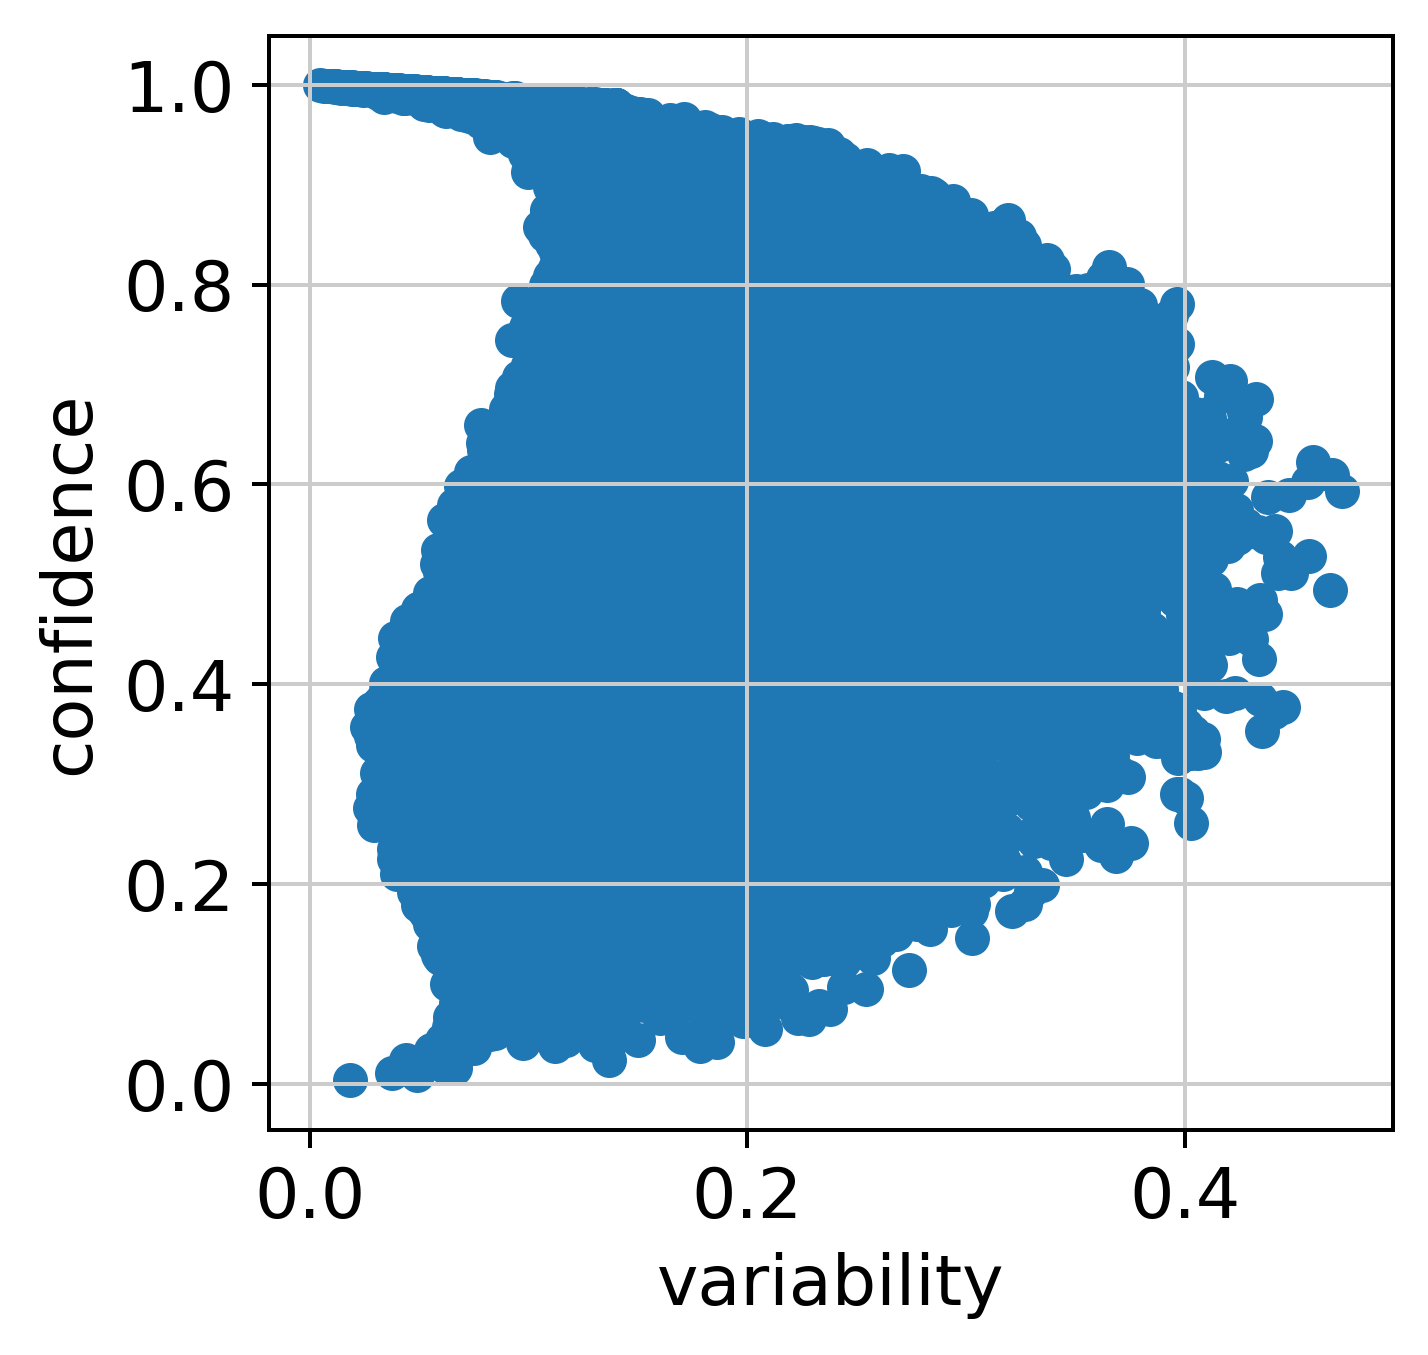

In [13]:
plt.scatter( all_var.detach().numpy(),all_conf.detach().numpy())
plt.xlabel('variability')
plt.ylabel('confidence')
plt.show()

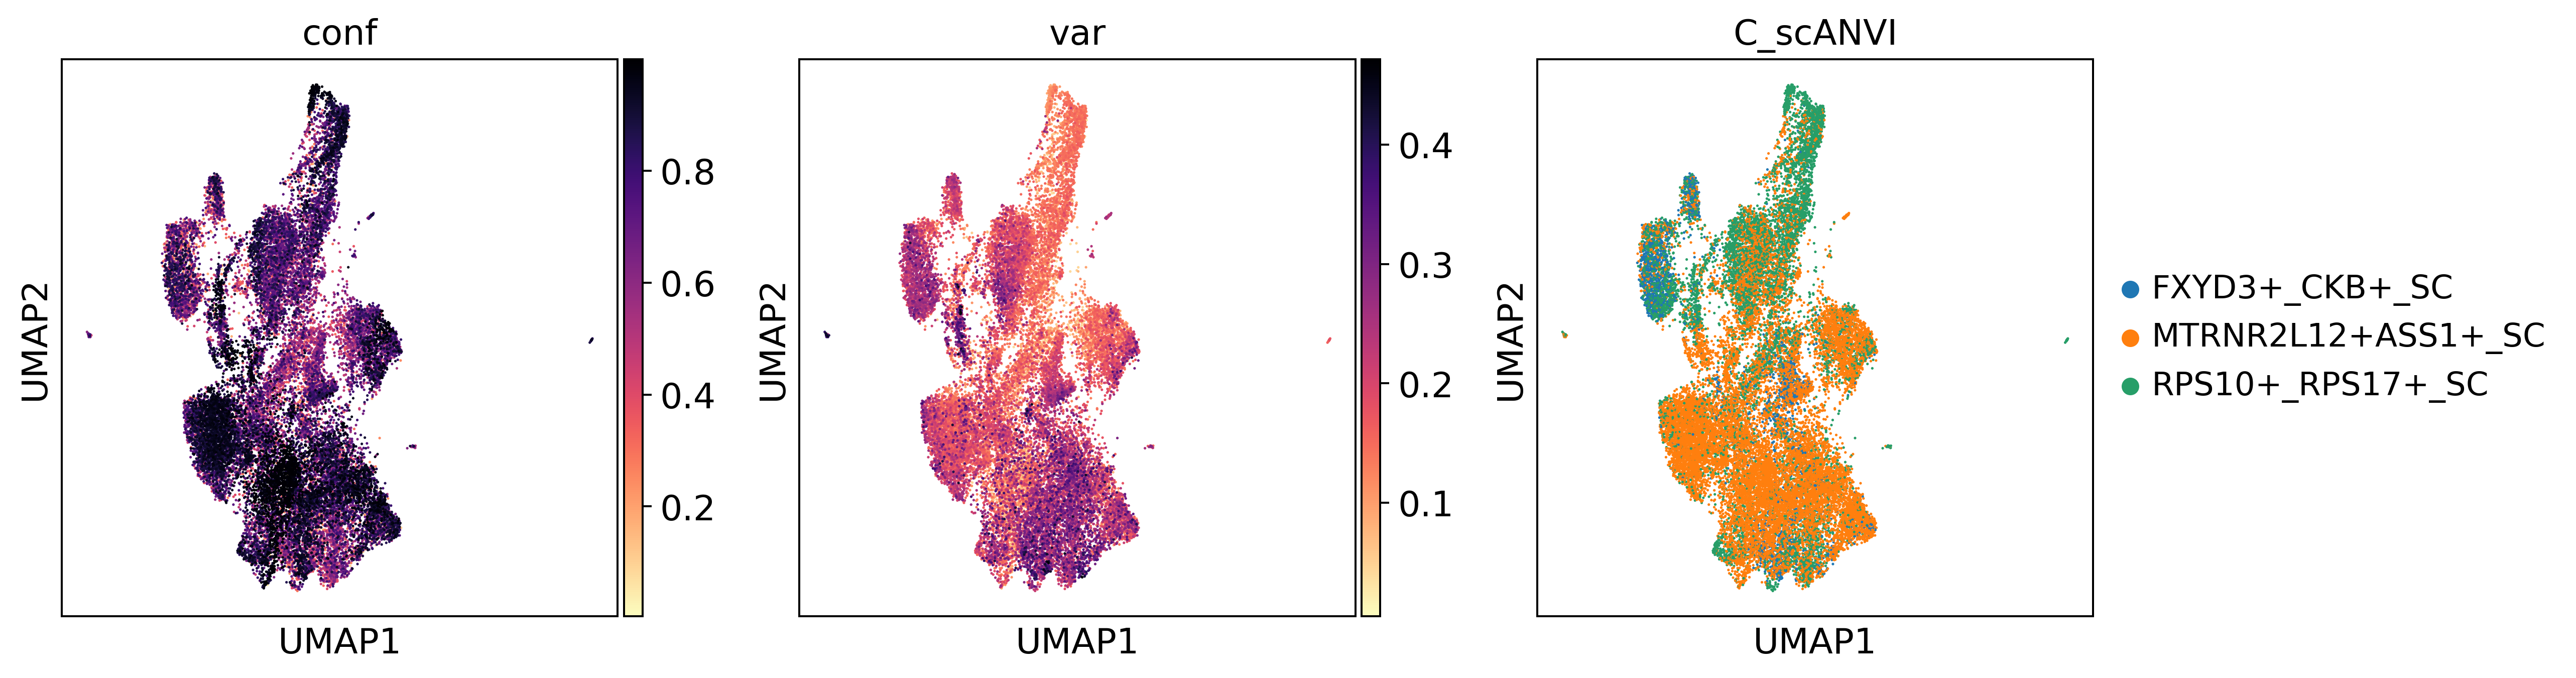

In [15]:
sc.pl.umap(adata,color=['conf','var','C_scANVI'])

In [16]:
conf, var = models.find_cutoff_paramter(adata,'C_scANVI', device=device, probability=0.05,percentile=50, epoch_num=epoch_num)

[1,     2] loss: 0.246
[1,    12] loss: 1.554
[1,    22] loss: 1.083
[1,    32] loss: 1.021
[1,    42] loss: 1.000
[1,    52] loss: 1.000
[1,    62] loss: 1.024
[1,    72] loss: 0.972
[1,    82] loss: 0.978
[1,    92] loss: 0.987
[1,   102] loss: 0.975
[2,     2] loss: 0.193
[2,    12] loss: 1.000
[2,    22] loss: 0.966
[2,    32] loss: 0.968
[2,    42] loss: 0.953
[2,    52] loss: 0.961
[2,    62] loss: 0.928
[2,    72] loss: 0.909
[2,    82] loss: 0.927
[2,    92] loss: 0.973
[2,   102] loss: 0.942
[3,     2] loss: 0.196
[3,    12] loss: 0.936
[3,    22] loss: 0.944
[3,    32] loss: 0.932
[3,    42] loss: 0.890
[3,    52] loss: 0.903
[3,    62] loss: 0.882
[3,    72] loss: 0.909
[3,    82] loss: 0.898
[3,    92] loss: 0.911
[3,   102] loss: 0.873
[4,     2] loss: 0.180
[4,    12] loss: 0.923
[4,    22] loss: 0.874
[4,    32] loss: 0.873
[4,    42] loss: 0.894
[4,    52] loss: 0.877
[4,    62] loss: 0.864
[4,    72] loss: 0.911
[4,    82] loss: 0.853
[4,    92] loss: 0.886
[4,   102] 

In [17]:
conf, var

(0.289936825633049, 0.16301491111516953)

In [19]:
import pandas as pd

In [20]:
adata.obs['conf_binaries'] = pd.Categorical((adata.obs['conf'] > conf) |  (adata.obs['var'] > var))

In [21]:
adata.obs['conf_correct'] = pd.Categorical((adata.obs['conf'] > 0.95) &  (adata.obs['var'] < 0.2))

In [22]:
adata.obs['conf_binaries'].value_counts()

conf_binaries
True     26794
False      864
Name: count, dtype: int64

In [23]:
adata.obs['conf_correct'].value_counts()

conf_correct
False    25022
True      2636
Name: count, dtype: int64

In [24]:
corr_classified_list =[]
for i in range(adata.n_obs):
    if adata.obs['conf_binaries'][i]==False:
        corr_classified_list.append('Erroneously annotated')
    else:
        if adata.obs['conf_correct'][i]==False:
            corr_classified_list.append('Ambiguous annotation')
        else:
            corr_classified_list.append('Correctly annotated')

adata.obs['Annotation']=corr_classified_list

In [25]:
adata.obs['Confidence']=adata.obs['conf']
adata.obs['Variability']=adata.obs['var']

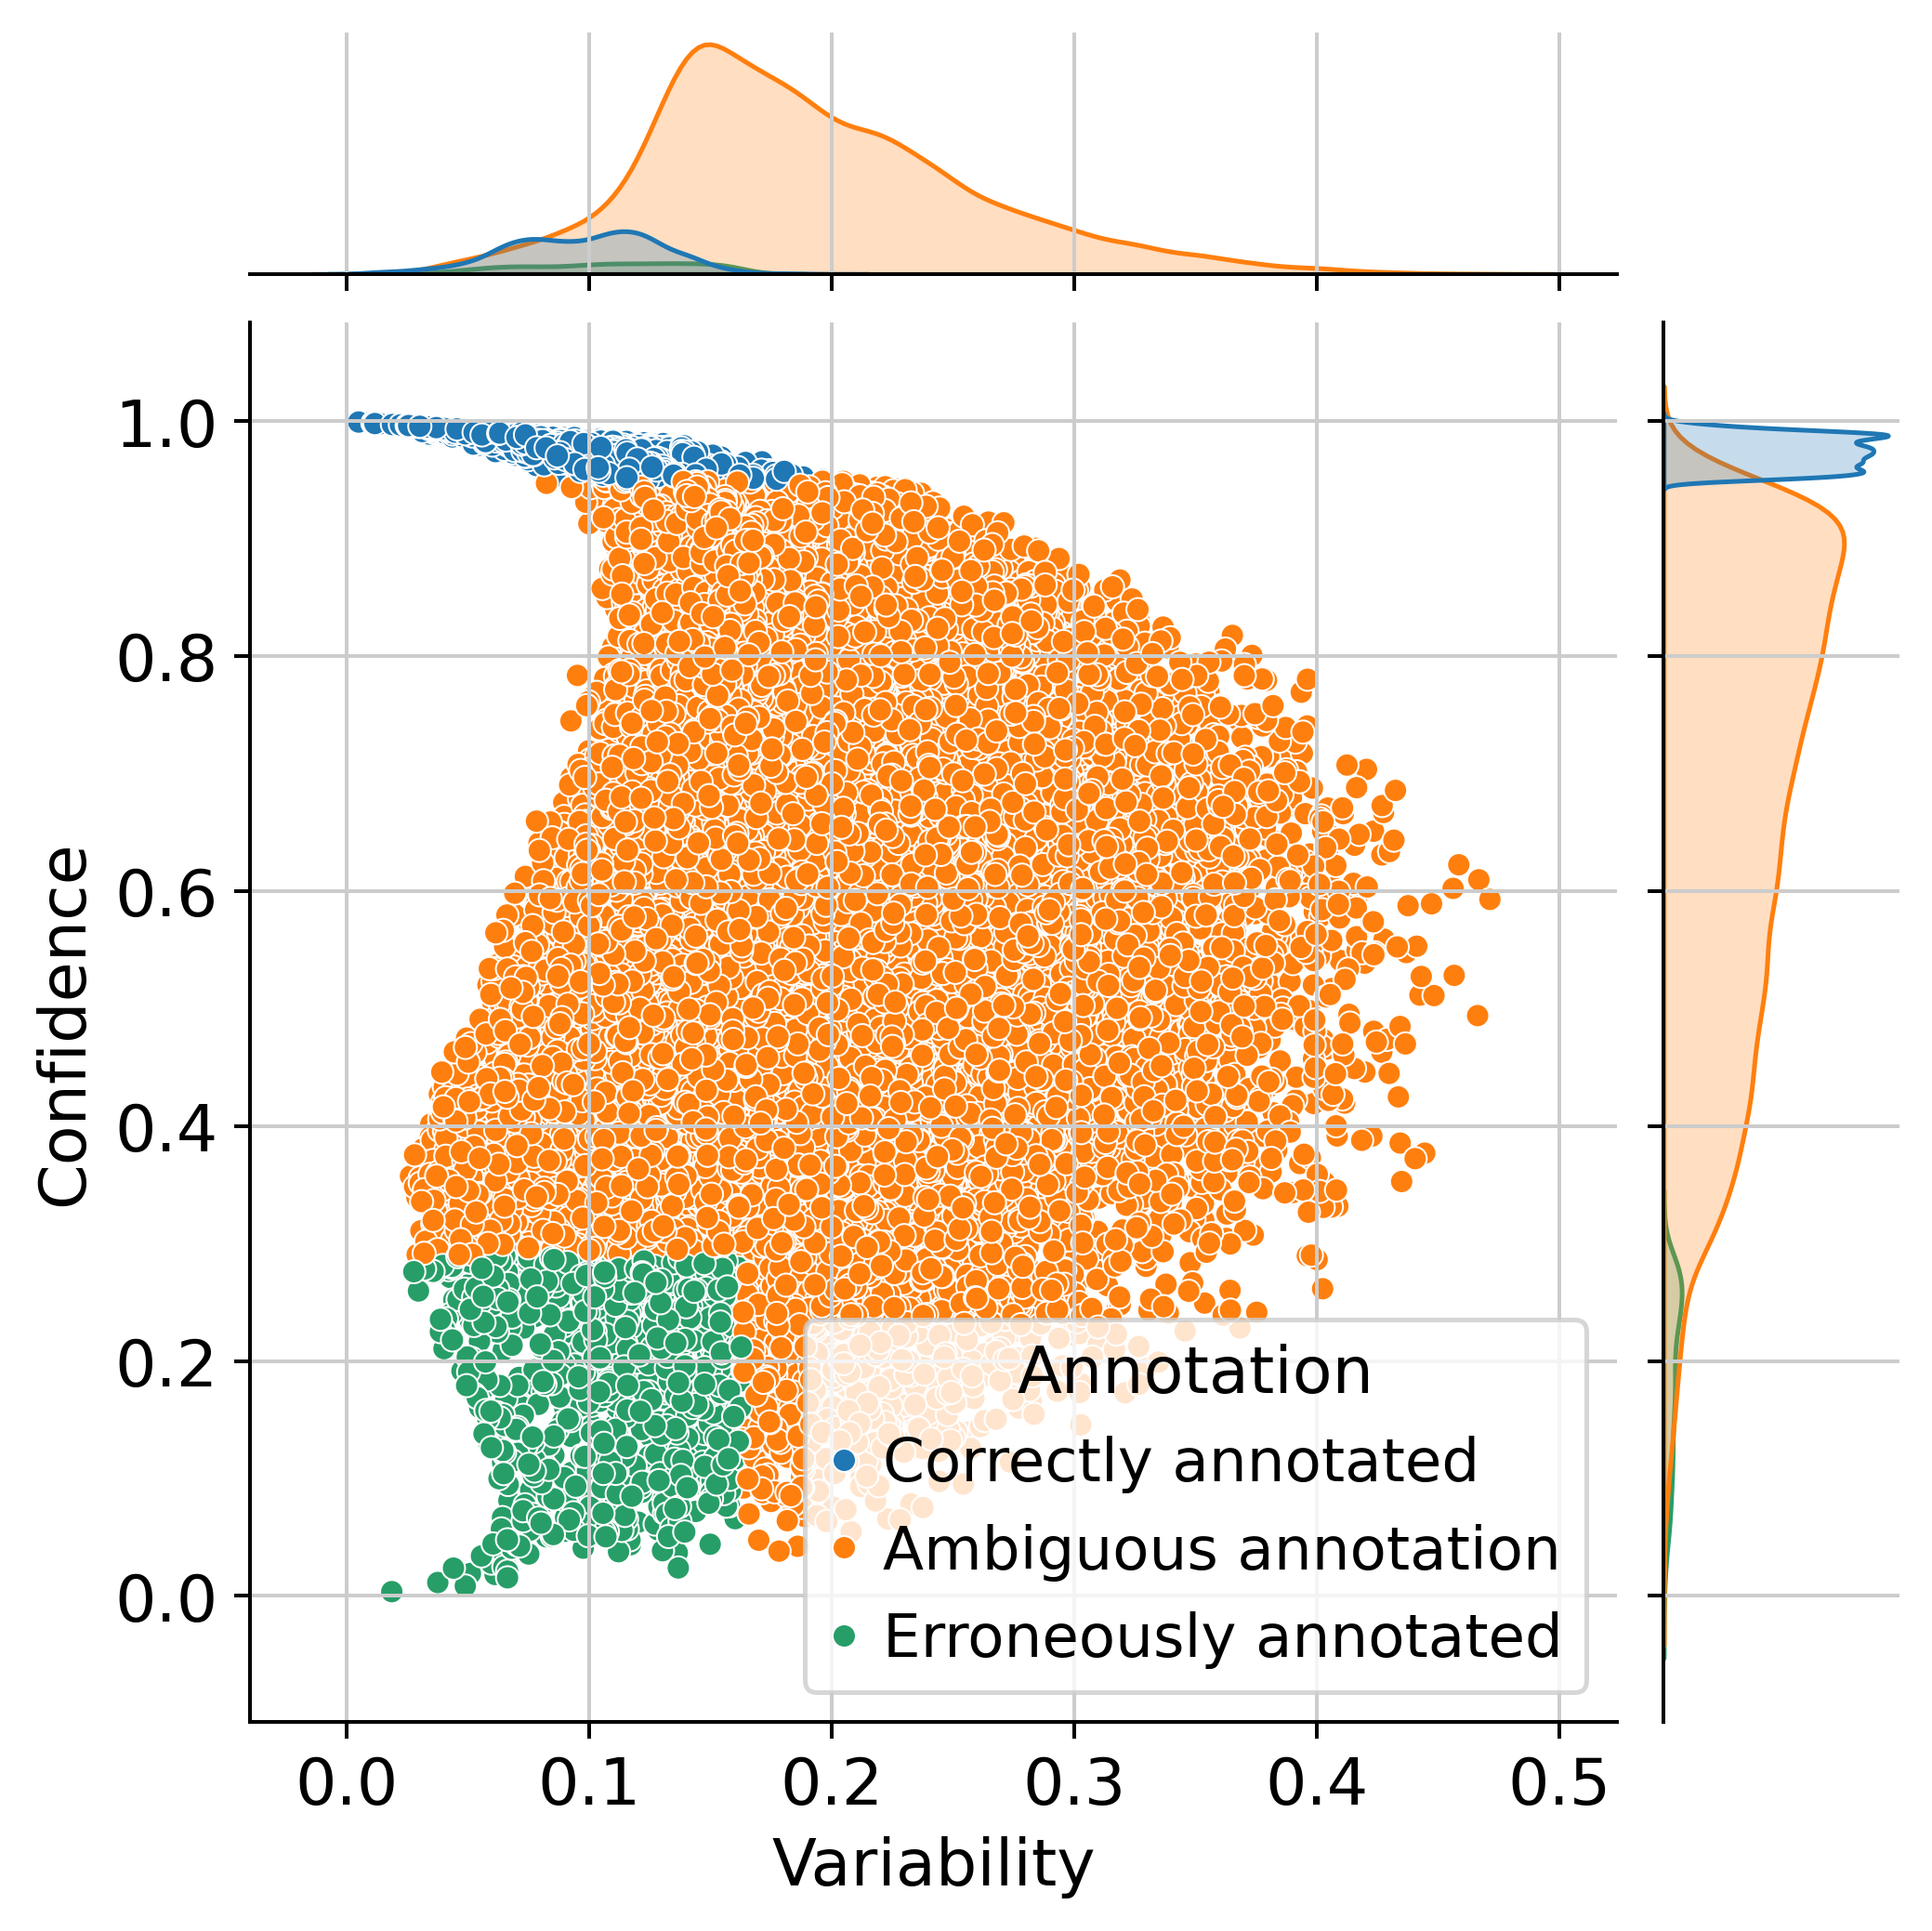

In [28]:
fig = sns.jointplot(data=adata.obs, x="Variability", y="Confidence",hue='Annotation',s=25)
plt.show(fig)

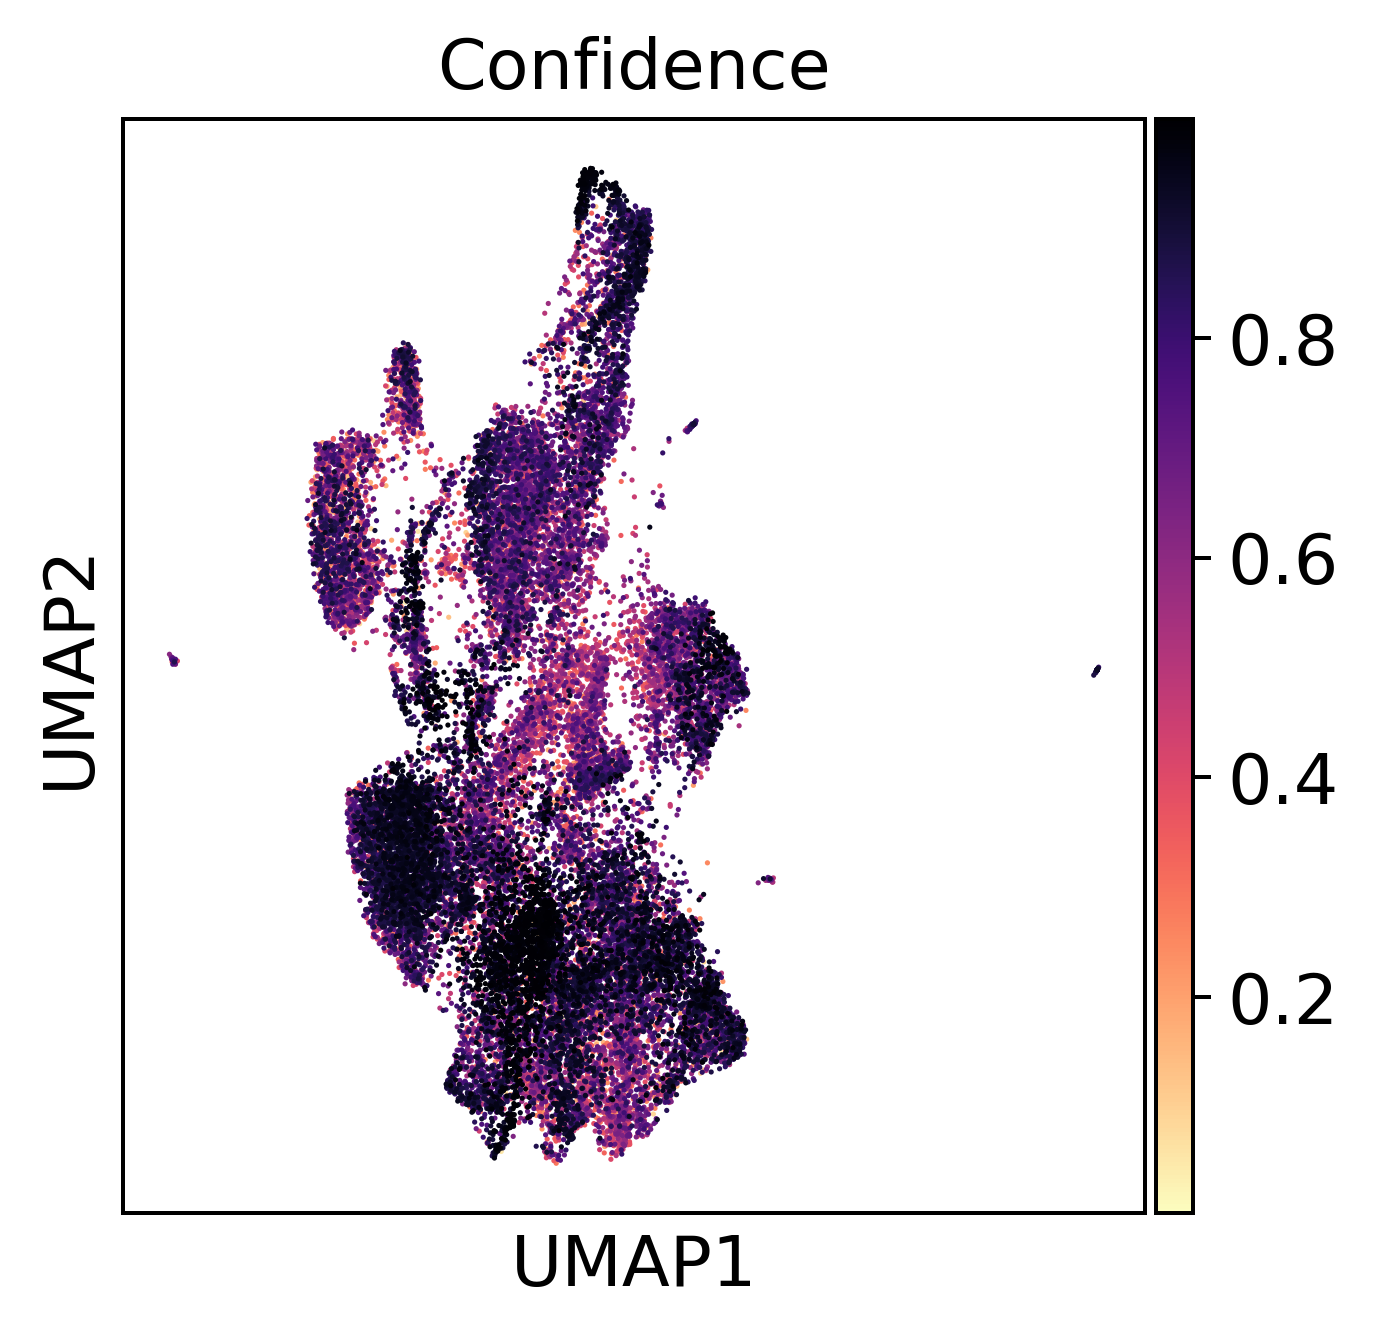

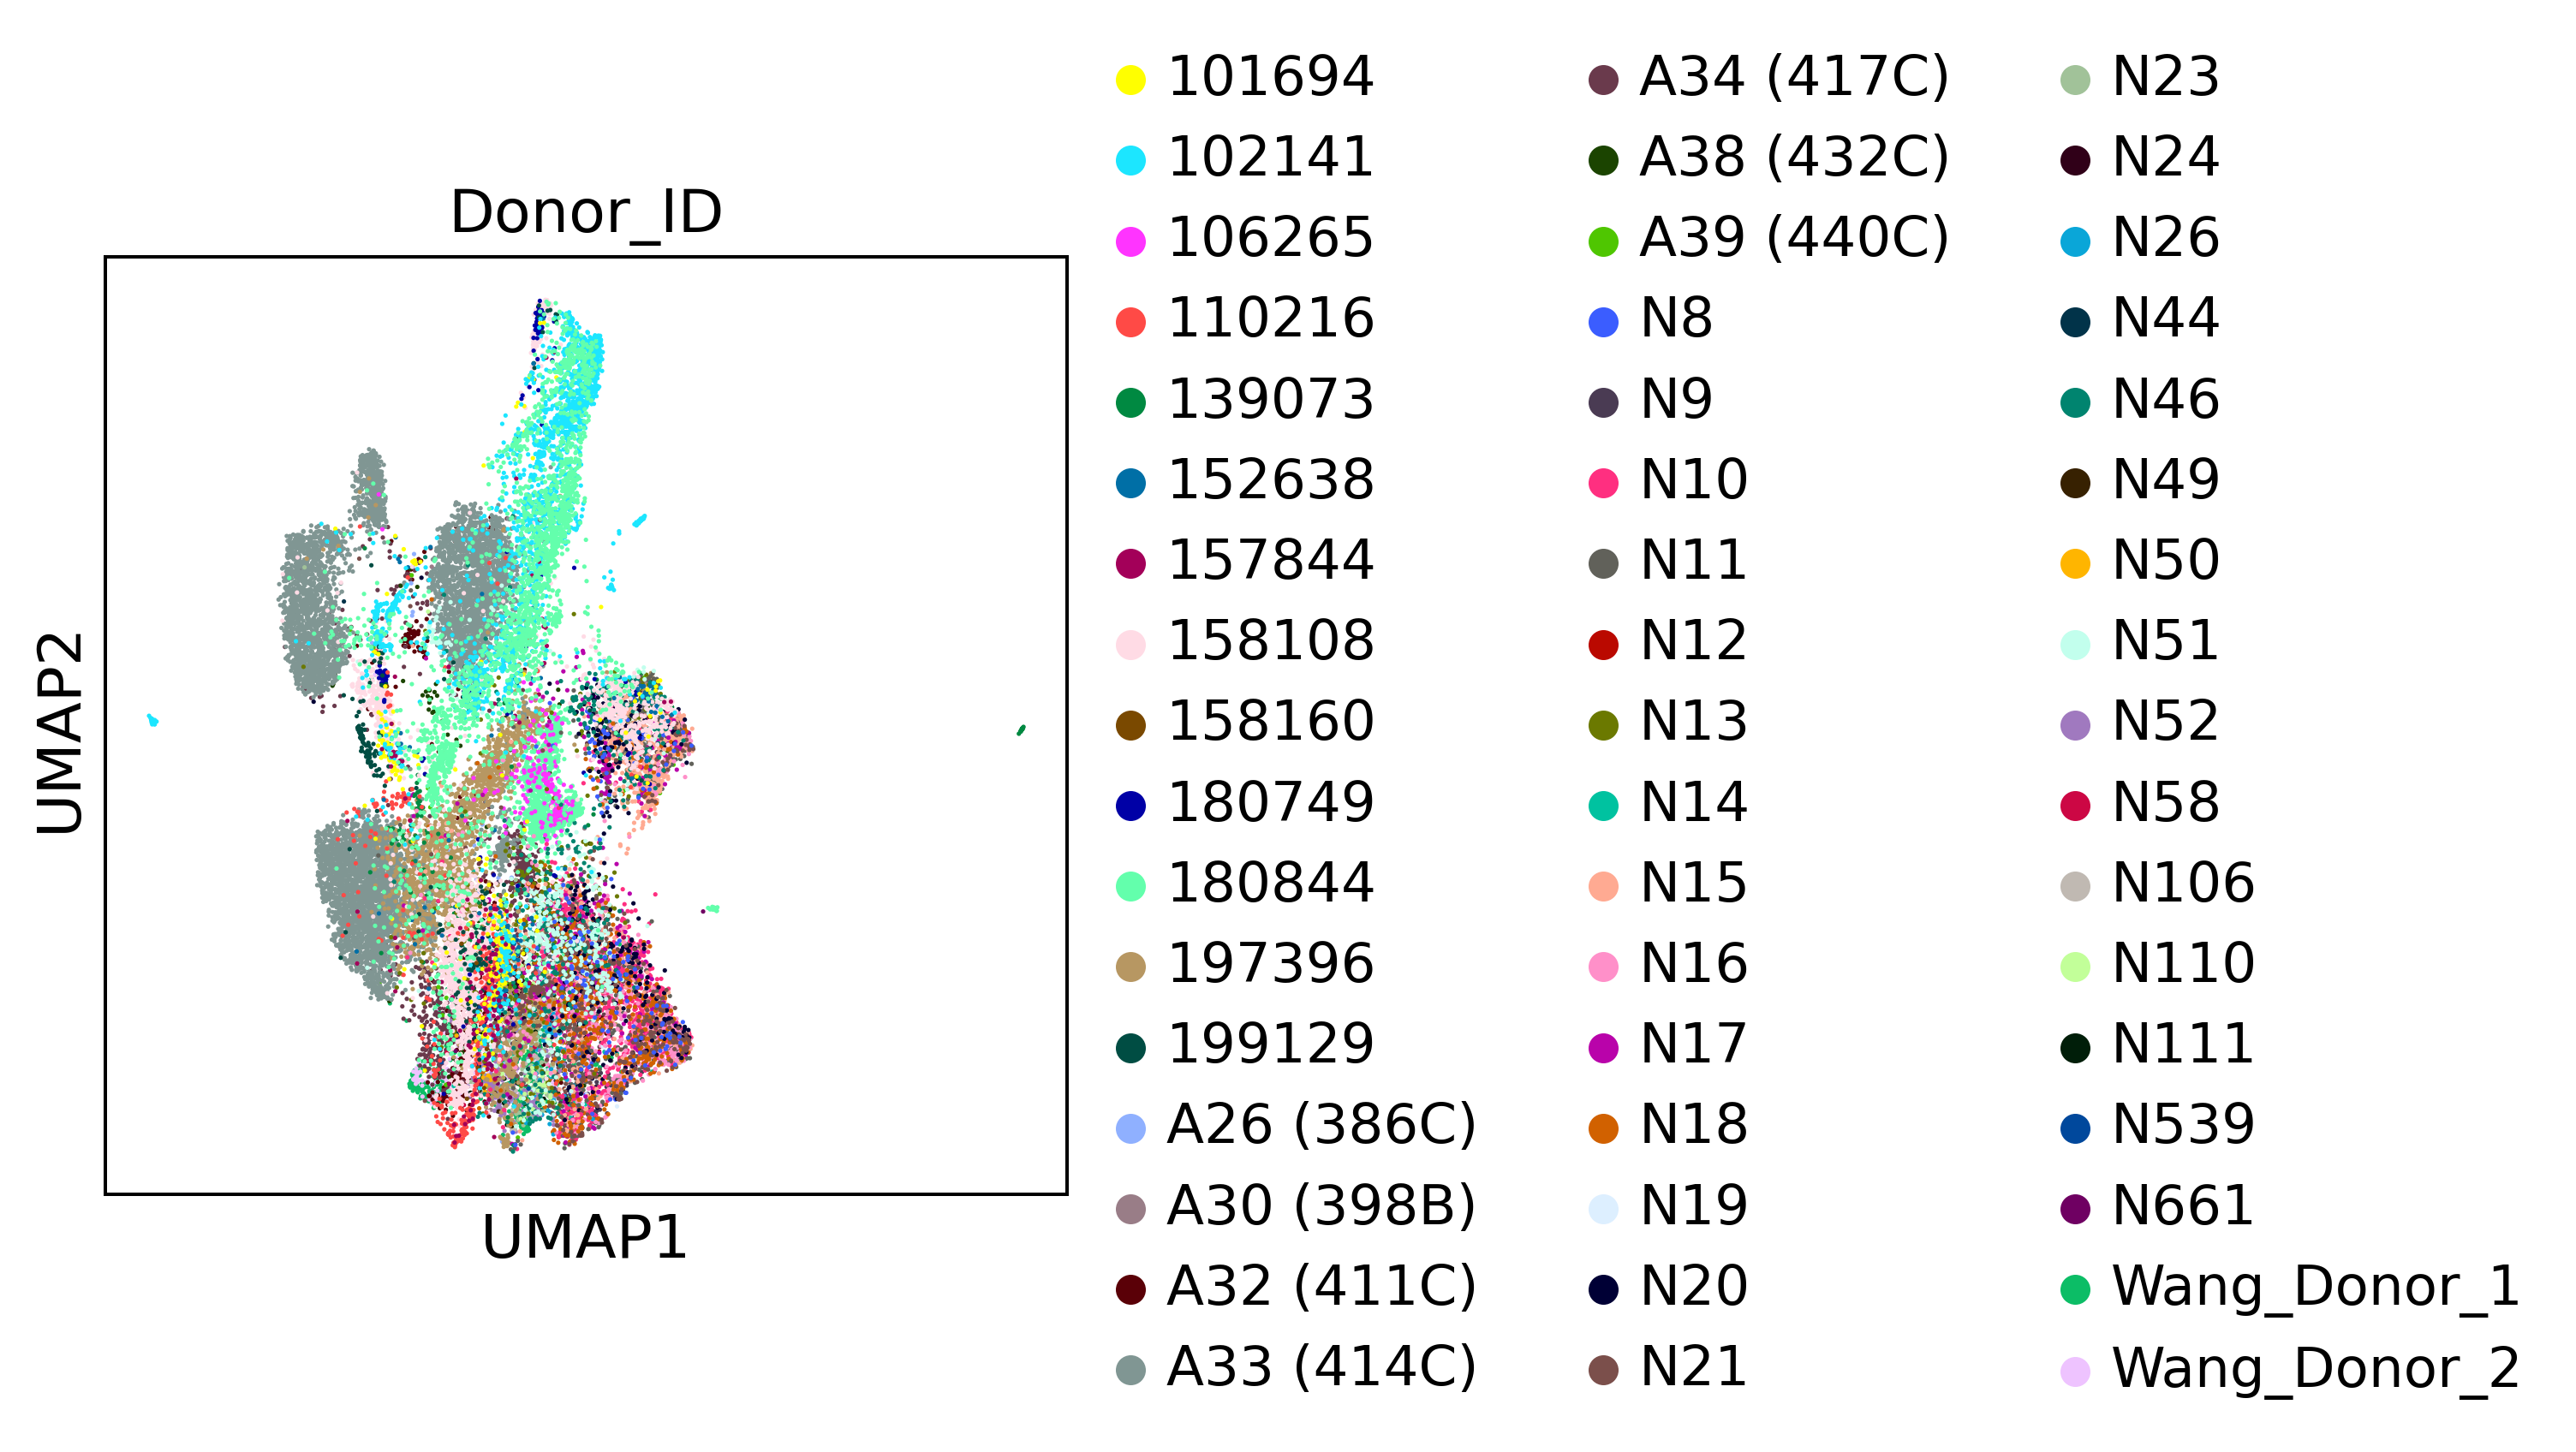

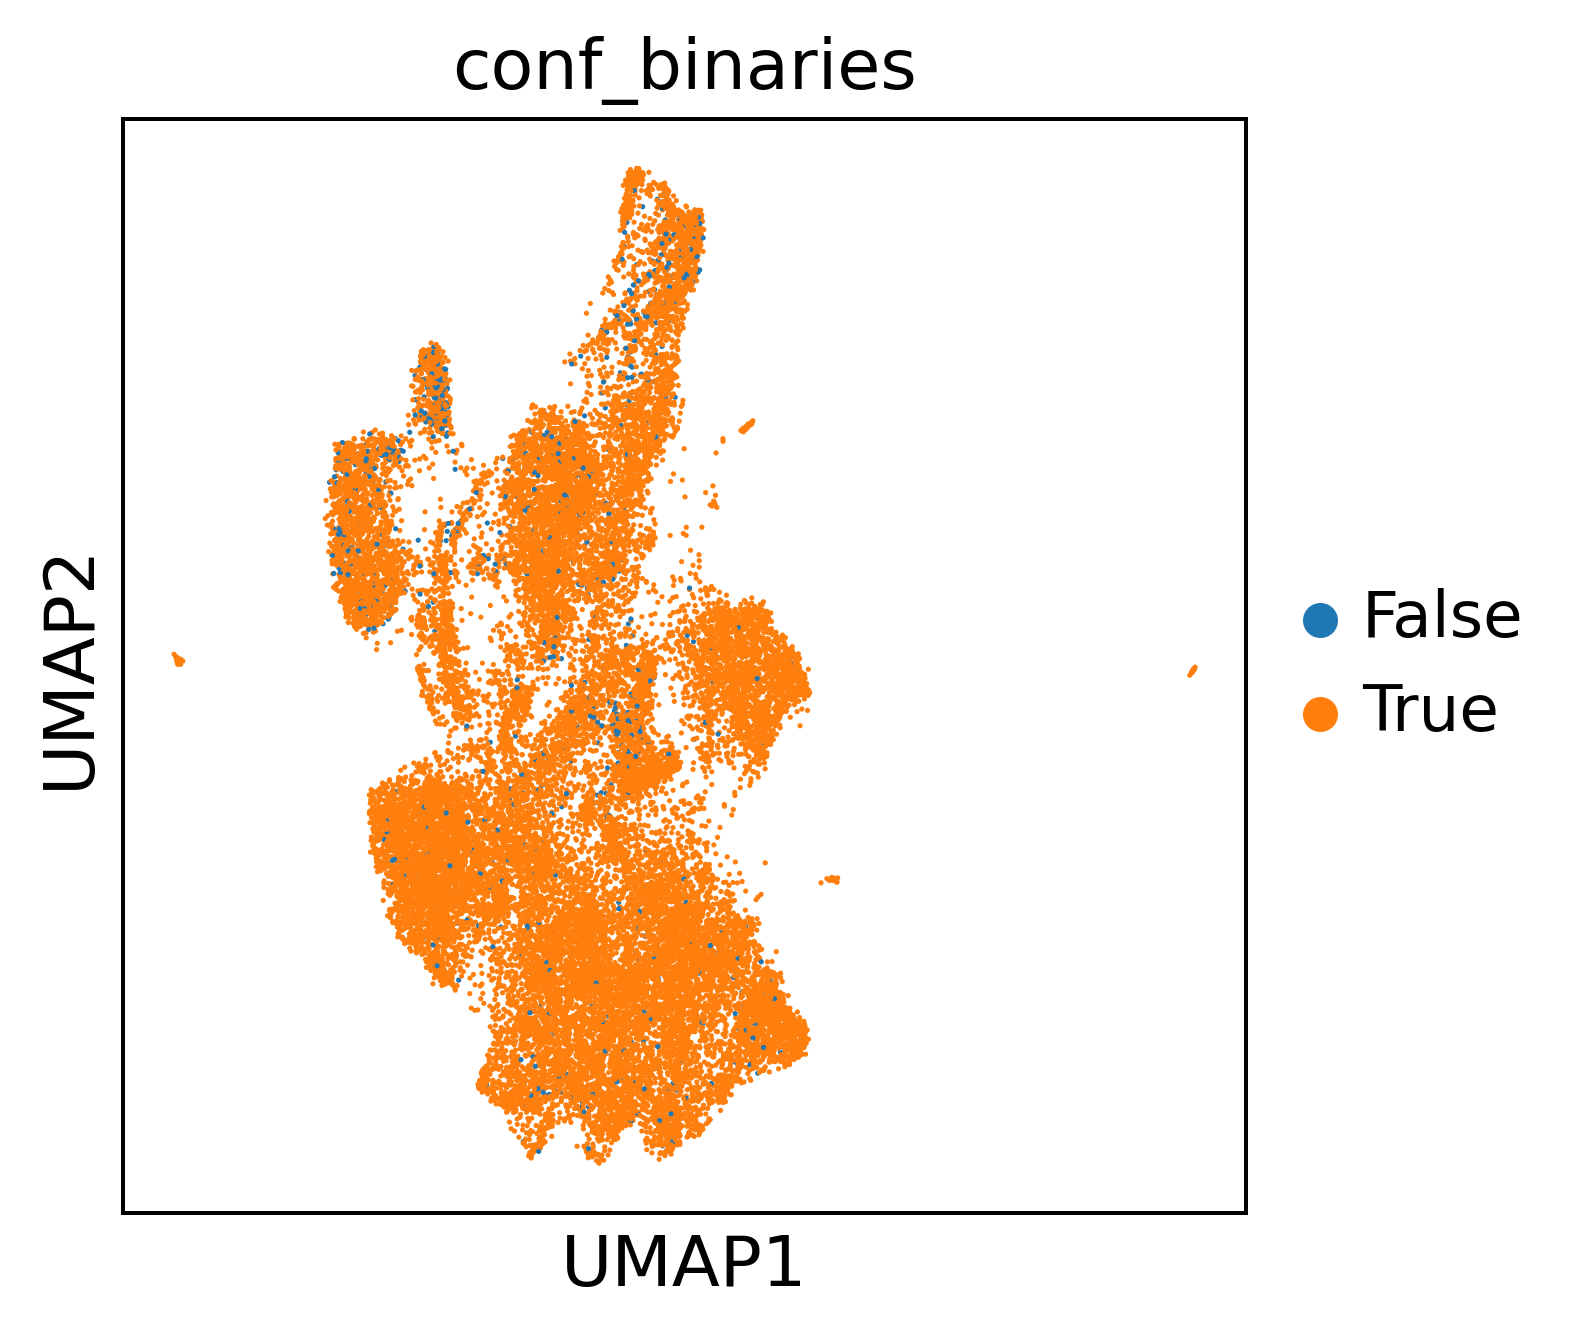

In [30]:
sc.pl.umap(adata,color=['conf'], title='Confidence')
sc.pl.umap(adata,color=['Donor_ID'])
sc.pl.umap(adata,color=['conf_binaries'])